# Vision por Computadora I - CEIA

## Trabajo Practico N° 3

#### Autor: Juan Ignacio Ribet

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [1]:
#%matplotlib qt

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Defino la funcion 'logo_deteccion' con las diferentes variables que voy a utilizar para detectar los logos.

In [10]:
def logo_deteccion(img_path: str, templ_path :str, method: int,temp_width = None, temp_heigth = None,
                   bitwise_not = True):
    ''' Función para detectar logos en imagenes.
        img_path: imagen path
        templ_path: template path
        method: (cv.TM_CCOEFF: 4, cv.TM_CCOEFF_NORMED: 5, cv.TM_CCORR: 2, cv.TM_CCORR_NORMED: 3
                cv.TM_SQDIFF: 0, cv.TM_SQDIFF_NORMED: 1) 
        temp_width & temp_width : Para modificar el tamaño del template segun la imagen
    '''
    
    meth = {4 : 'cv.TM_CCOEFF', 5: 'cv.TM_CCOEFF_NORMED', 2 : 'cv.TM_CCORR', 3 : 'cv.TM_CCORR_NORMED',
                0: 'cv.TM_SQDIFF', 1 : 'cv.TM_SQDIFF_NORMED'}
    
    # Cargamos la imagen
    img = cv.imread(img_path)
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Cargamos el template
    template = cv.imread(templ_path,0)
    if bitwise_not == True:
        template = cv.bitwise_not(template)

   # Cambiamos las dimensiones del template para que coincida con los logos de las imagenes    
    if (temp_width is not None) and (temp_heigth is not None):
        template = cv.resize(template, [temp_width,temp_heigth])
    
    # Aplicamos la coincidencia de patrones
    res = cv.matchTemplate(img_gray, template, method)
    
    # Encontramos la ubicaion de los valores máximos y mínimos
    _, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print(max_val)

    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [0, 1]:
        top_left = min_loc
        
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    bottom_right = (top_left[0] + temp_width, top_left[1] + temp_heigth)
    cv.rectangle(img_rgb,top_left, bottom_right, (0,0,255), 3)

    plt.figure()
    
    # Imagen original con recuadro
    plt.imshow(img_rgb)
    plt.title('Logo detectado'); plt.axis('off')
    
    plt.suptitle(meth.get(method))
    plt.show()



In [268]:
# Verifico los valores de los metodos de 'matchTemplate'
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    method = eval(meth)
    print(meth, method)

cv.TM_CCOEFF 4
cv.TM_CCOEFF_NORMED 5
cv.TM_CCORR 2
cv.TM_CCORR_NORMED 3
cv.TM_SQDIFF 0
cv.TM_SQDIFF_NORMED 1


Paso cada imagen por la funcion con las diferentes configuraciones segun la imagen

0.5549460649490356


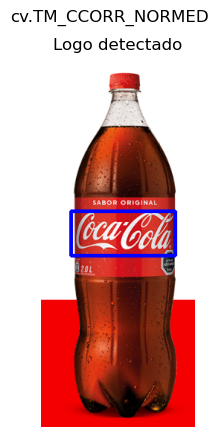

0.563030481338501


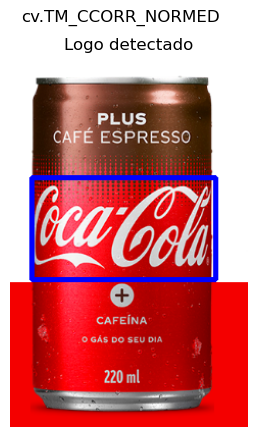

0.6536093950271606


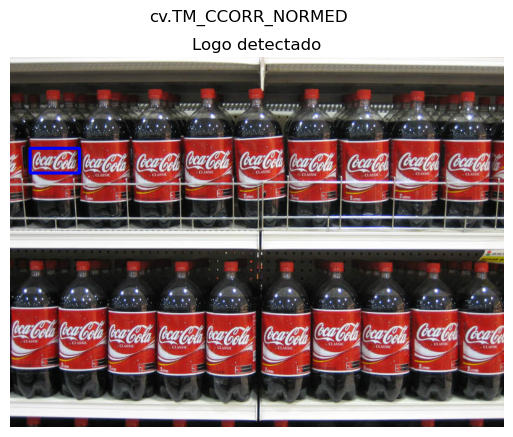

0.36863693594932556


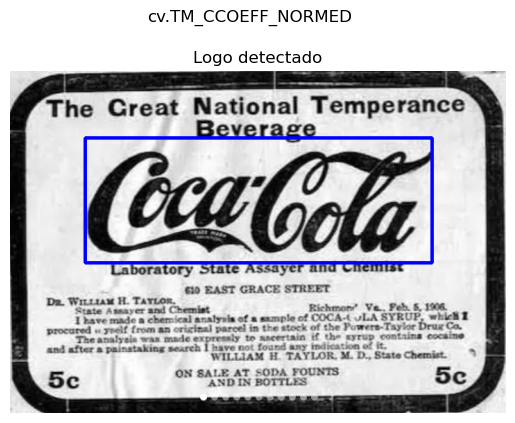

0.6685565710067749


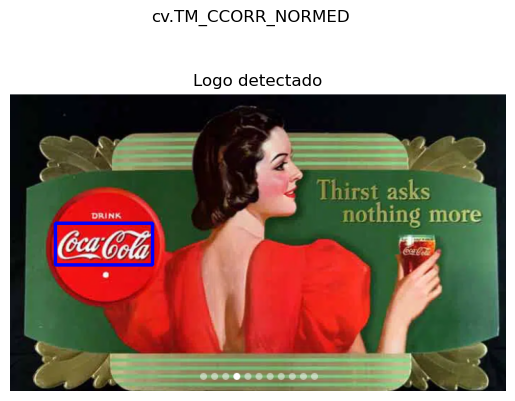

0.6481568217277527


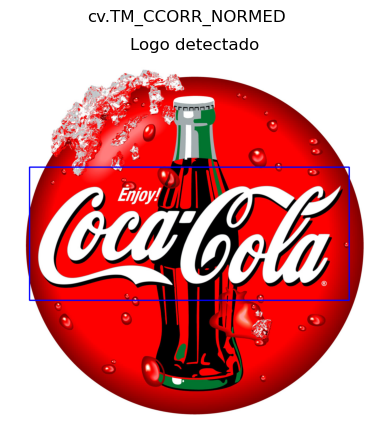

0.6055129766464233


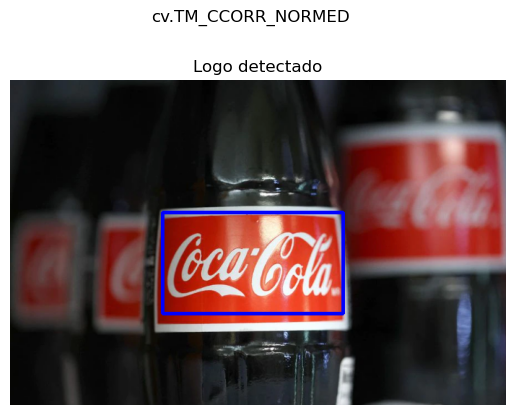

In [11]:
logo_deteccion('images\coca_logo_1.png', 'template\pattern.png', 3, 140, 60)

logo_deteccion('images\coca_logo_2.png', 'template\pattern.png', 3, 180, 100)

logo_deteccion('images\coca_multi.png', 'template\pattern.png', 3, 80, 40)

logo_deteccion('images\coca_retro_1.png', 'template\pattern.png', 5, 500, 180, False)

logo_deteccion('images\coca_retro_2.png', 'template\pattern.png', 3, 140, 60)

logo_deteccion('images\COCA-COLA-LOGO.jpg', 'template\pattern.png', 3, 1200, 500)

logo_deteccion('images\logo_1.png', 'template\pattern.png', 3, 250, 140)


2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

Detecto los multiples logos definiendo un 'threshold' del valor de 'res'

1.0542087016567108


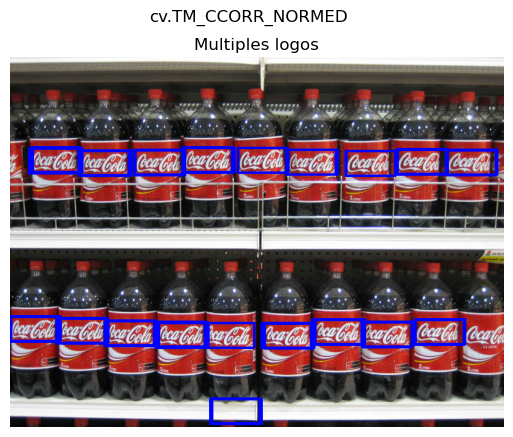

In [15]:
# Cargamos la imagen
img = cv.imread('images\coca_multi.png')
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Cargamos el template
template = cv.imread('template\pattern.png',0)
template = cv.bitwise_not(template)
template = cv.resize(template, [80,40])

w, h = template.shape[::-1]
# Aplicamos la coincidencia de patrones
res = cv.matchTemplate(img_gray,template, cv.TM_CCORR_NORMED)
print(res.max()/0.62)
# Fijamos un umbral de "coincidencia"
threshold = 0.95 * res.max()

loc = np.where( res > threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.title('Multiples logos'); plt.suptitle('cv.TM_CCORR_NORMED')
plt.axis('off');plt.imshow(img_rgb);plt.show()

3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [33]:
def logo_deteccion_multi(img_path: str, templ_path :str, method: int,temp_width = None, temp_heigth = None,
                   bitwise_not = True):
    ''' Función para detectar logos en imagenes.
        img_path: imagen path
        templ_path: template path
        method: (cv.TM_CCOEFF: 4, cv.TM_CCOEFF_NORMED: 5, cv.TM_CCORR: 2, cv.TM_CCORR_NORMED: 3
                cv.TM_SQDIFF: 0, cv.TM_SQDIFF_NORMED: 1) 
        temp_width & temp_width : Para modificar el tamaño del template segun la imagen
    '''
    
    meth = {4 : 'cv.TM_CCOEFF', 5: 'cv.TM_CCOEFF_NORMED', 2 : 'cv.TM_CCORR', 3 : 'cv.TM_CCORR_NORMED',
                0: 'cv.TM_SQDIFF', 1 : 'cv.TM_SQDIFF_NORMED'}
    
    # Cargamos la imagen
    img = cv.imread(img_path)
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Cargamos el template
    template = cv.imread(templ_path,0)
    if bitwise_not == True:
        template = cv.bitwise_not(template)

   # Cambiamos las dimensiones del template para que coincida con los logos de las imagenes    
    if (temp_width is not None) and (temp_heigth is not None):
        template = cv.resize(template, [temp_width,temp_heigth])
    
    # Aplicamos la coincidencia de patrones
    res = cv.matchTemplate(img_gray, template, method)
    
    # Encontramos la ubicaion de los valores máximos y mínimos
    _, max_val, _, _ = cv.minMaxLoc(res)
    
    print(f'Nivel de confianza:  {round(max_val*100,0)} %')
    
    # Fijamos un umbral de "coincidencia" como el 95% del valor maximo de match
    threshold = 0.95 * max_val

    loc = np.where( res > threshold)
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_rgb, pt, (pt[0] + temp_width, pt[1] + temp_heigth), (0,0,255), 2)

    plt.figure()
    
    # Imagen original con recuadro
    plt.imshow(img_rgb)
    plt.title('Logo detectado'); plt.axis('off')
    
    plt.suptitle(meth.get(method))
    plt.show()


Nivel de confianza:  55.0 %


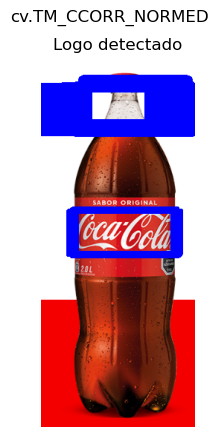

Nivel de confianza:  56.0 %


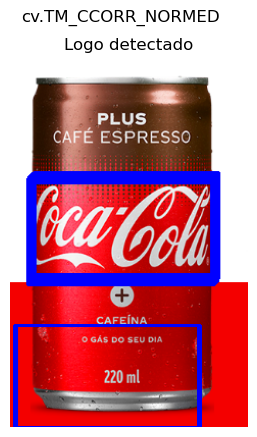

Nivel de confianza:  65.0 %


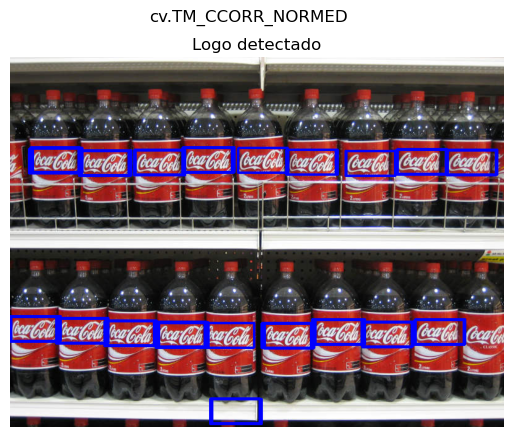

Nivel de confianza:  37.0 %


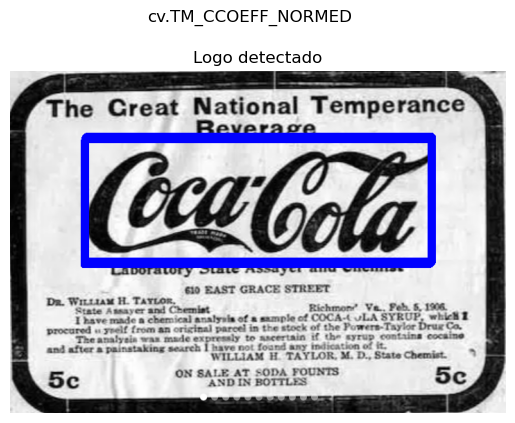

Nivel de confianza:  67.0 %


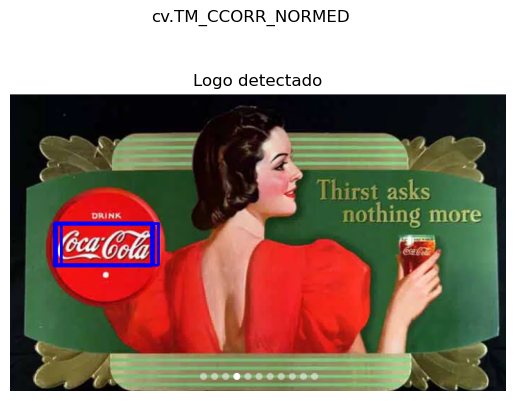

Nivel de confianza:  65.0 %


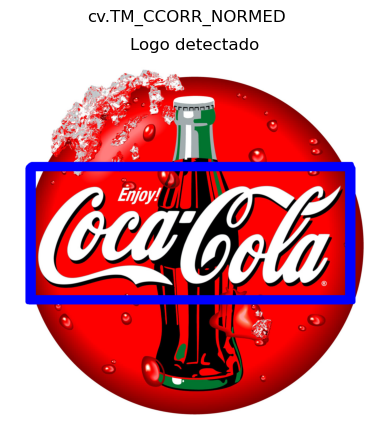

Nivel de confianza:  61.0 %


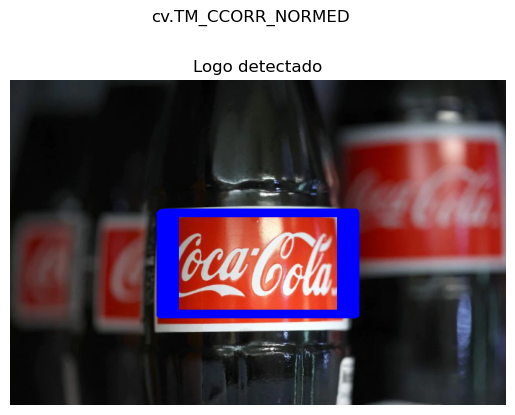

In [34]:
logo_deteccion_multi('images\coca_logo_1.png', 'template\pattern.png', 3, 140, 60)

logo_deteccion_multi('images\coca_logo_2.png', 'template\pattern.png', 3, 180, 100)

logo_deteccion_multi('images\coca_multi.png', 'template\pattern.png', 3, 80, 40)

logo_deteccion_multi('images\coca_retro_1.png', 'template\pattern.png', 5, 500, 180, False)

logo_deteccion_multi('images\coca_retro_2.png', 'template\pattern.png', 3, 140, 60)

logo_deteccion_multi('images\COCA-COLA-LOGO.jpg', 'template\pattern.png', 3, 1200, 500)

logo_deteccion_multi('images\logo_1.png', 'template\pattern.png', 3, 250, 140)